In [11]:
import requests
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

def obtener_datos_historicos(simbolo, meses=12):
    """
    Obtiene datos históricos de los últimos X meses para un símbolo
    """
    try:
        # Calcular timestamps
        fecha_fin = datetime.now()
        fecha_inicio = fecha_fin - timedelta(days=30*meses)
        
        # Convertir a timestamp en milisegundos
        start_time = int(fecha_inicio.timestamp() * 1000)
        end_time = int(fecha_fin.timestamp() * 1000)
        
        # URL de la API de Binance para datos históricos
        url = f"https://api.binance.com/api/v3/klines"
        params = {
            'symbol': simbolo,
            'interval': '1d',  # Cambiado a intervalos horarios para más detalle
            'startTime': start_time,
            'endTime': end_time,
            'limit': 1000
        }
        
        response = requests.get(url, params=params)
        data = response.json()
        
        # Crear DataFrame
        df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 
                                       'volume', 'close_time', 'quote_volume', 'trades',
                                       'taker_buy_base', 'taker_buy_quote', 'ignore'])
        
        # Convertir timestamp a datetime y usar como índice
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        
        # Convertir precios a float
        df['close'] = df['close'].astype(float)
        
        return df
    except Exception as e:
        print(f"Error obteniendo datos para {simbolo}: {e}")
        return None

def comparar_cryptos(simbolos):
    """
    Crea una gráfica interactiva comparativa de múltiples criptomonedas
    """
    # Colores para cada criptomoneda
    # colores = {
    #     'BTCUSDT': '#FF9500',  # Naranja
    #     'ETHUSDT': '#2ECC71',  # Verde
    #     'XRPUSDT': '#3498DB'   # Azul
    # }
    
    # Crear figura
    fig = go.Figure()
    
    for simbolo in simbolos:
        df = obtener_datos_historicos(simbolo)
        if df is not None:
            # Normalizar precios (precio inicial = 100)
            precios_norm = df['close'] * 100 / df['close'].iloc[0]
            
            # Añadir línea para cada criptomoneda
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=precios_norm,
                    name=simbolo.replace('USDT', ''),
                    line=dict(width=2),
                    hovertemplate=
                    "<b>%{fullData.name}</b><br>" +
                    "Fecha: %{x}<br>" +
                    "Valor Normalizado: %{y:.2f}<br>" +
                    "<extra></extra>"  # Elimina la información secundaria del hover
                )
            )
    
    # Actualizar el diseño
    fig.update_layout(
        title={
            'text': 'Comparación de Rendimiento a 1 Año (Normalizado, Inicio = 100)',
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title="Fecha",
        yaxis_title="Precio Normalizado",
        hovermode='x unified',
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01,
            bgcolor='rgba(255, 255, 255, 0.8)'
        ),
        plot_bgcolor='white',
        xaxis=dict(
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray'
        ),
        yaxis=dict(
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray',
            zeroline=False
        )
    )
    
    # Mostrar figura
    fig.show()

# Ejemplo de uso
simbolos = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'PEPEUSDT', 'CGPTUSDT']
comparar_cryptos(simbolos)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


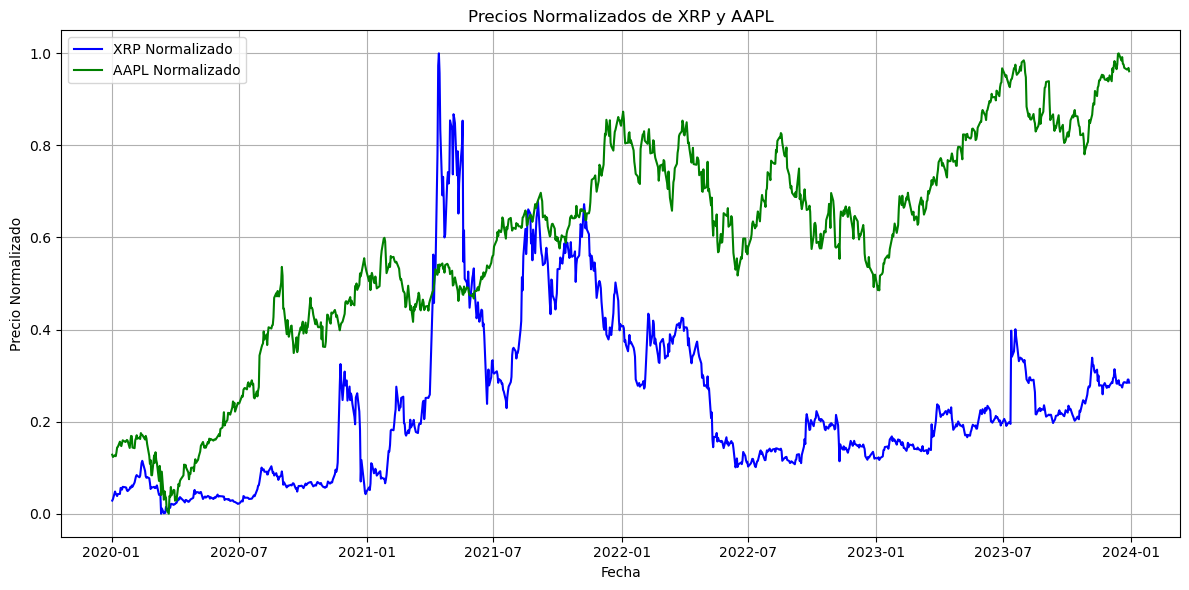

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos
def get_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    return data['Close']  # Usamos solo los precios de cierre

# Normalizar los datos
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Parámetros
start_date = "2020-01-01"
end_date = "2023-12-31"

# Obtener datos
xrp_data = get_data("XRP-USD", start=start_date, end=end_date)
aapl_data = get_data("AAPL", start=start_date, end=end_date)

# Unir y alinear datos
df = pd.concat([xrp_data, aapl_data], axis=1, keys=["XRP", "AAPL"]).dropna()

# Normalizar los datos
df["XRP_Norm"] = normalize(df["XRP"])
df["AAPL_Norm"] = normalize(df["AAPL"])

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["XRP_Norm"], label="XRP Normalizado", color="blue")
plt.plot(df.index, df["AAPL_Norm"], label="AAPL Normalizado", color="green")
plt.title("Precios Normalizados de XRP y AAPL")
plt.xlabel("Fecha")
plt.ylabel("Precio Normalizado")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
